In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
Ns = 1000
n = 4
y = np.random.randint(n, size=Ns)

In [27]:
mod_dic = {
    0: 1.+1.j, 1: 1.-1.j, 2: -1.+1.j, 3: -1.-1.j,
}

mod_syms = np.array([mod_dic[i] for i in y])

Xr = np.real(mod_syms)
Xi = np.imag(mod_syms)

In [28]:
def add_noise(signal, target_snr_db):
    X_avg_p = np.mean(signal ** 2)
    X_avg_db = 10 * np.log10(X_avg_p)
    noise_avg_db_r = X_avg_db - target_snr_db
    noise_avg_p_r = 10 ** (noise_avg_db_r / 10)
    mean_noise = 0
    noise_r = np.random.normal(mean_noise, np.sqrt(noise_avg_p_r), len(signal))
    noisy_signal = signal + noise_r
    return noisy_signal

Xr_ch = add_noise(Xr, 8)
Xi_ch = add_noise(Xi, 8)

X = np.array([Xr_ch, Xi_ch]).T

In [29]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'brown', 'orange', 'purple', 'pink']

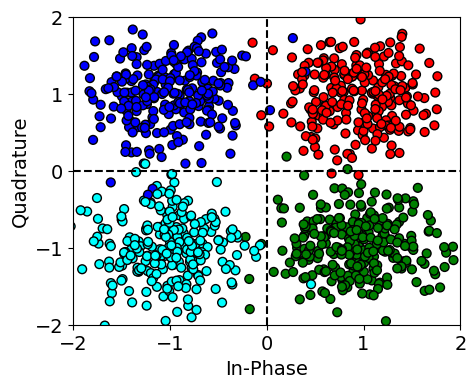

In [30]:
plt.figure(figsize=(5, 4))
plt.scatter(Xr_ch, Xi_ch, c=y, s=40, edgecolors='k', cmap=ListedColormap(colors[:n]))
plt.xlabel('In-Phase', fontsize=14)
plt.ylabel('Quadrature', fontsize=14)
plt.xticks(np.arange(-2, 3), fontsize=14)
plt.yticks(np.arange(-2, 3), fontsize=14)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.vlines(0, -2, 2, linestyles='dashed', colors='k')
plt.hlines(0, -2, 2, linestyles='dashed', colors='k')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

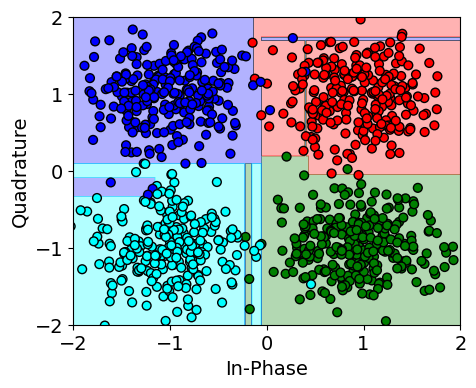

In [32]:
def generate_mesh(X, model, alpha=0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, alpha),
                         np.arange(y_min, y_max, alpha))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

xx, yy, Z = generate_mesh(X, dt)

plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(colors[:n]))
plt.scatter(Xr_ch, Xi_ch, c=y, s=40, edgecolors='k', cmap=ListedColormap(colors[:n]))
plt.xlabel('In-Phase', fontsize=14)
plt.ylabel('Quadrature', fontsize=14)
plt.xticks(np.arange(-2, 3), fontsize=14)
plt.yticks(np.arange(-2, 3), fontsize=14)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()